# Blatt 6

## Aufgabe 1 Zufallszahlentests

Betrachte die folgenden (Pseudo-)Zufallszahlengeneratoren

(A) Linearer Kongruenzgenerator
$x_{n+1} = (a x_n + b) \mod m$ 
mit m = 231,a = 65539,b = 0 (RANDU).

(B) Linearer Kongruenzgenerator 
mit m = 231,a = 1103515245,b = 12345 (GLIBC).

(C) Nachkommastellen von π.
Hinweis:
```python
from sympy.mpmath import mp
N=1000 # number of digits
mp.dps = N
s = str(mp.pi)
for i in range(2,N):
    print s[i]
```

(D) Der Standard-PRNG von Python (random()).


Der Startwert (SEED) kann frei gew ̈ahlt werden.

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp
import random

In [2]:
# Linearer Kongruenzgenerator
def lcg(m, a, b, x0, n):
    x = x0
    y = np.zeros(n)
    for i in range(n):
        x = (a*x + b) % m
        y[i] = x
    return y

def rand_a(n, seed=1):
    m = 2**32
    a = 65539
    b = 0
    x0 = seed
    return lcg(m, a, b, x0, n)

def rand_b(n, seed=1):
    m = 2**32
    a = 1103515245
    b = 12345
    x0 = seed
    return lcg(m, a, b, x0, n)

def rand_c(n):
    mp.dps = n
    s = str(mp.pi)
    y = np.zeros(n)
    for i in range(2,n):
        y[i] = int(s[i])
    return y

def rand_d(n):
    y = np.zeros(n)
    for i in range(n):
        y[i] = random.random()
    return y
def split(x):
    n=int(len(x)/3)
    x1 = x[0:n:3]
    x2 = x[1:n:3]
    x3 = x[2:n:3]
    return x1,x2,x3

### a) Bestimme f ̈ur alle PRNGs N = 10^4 Zufallszahlen 
in drei Spalten und plotte diese
dreidimensional (”Parking-Lot”- bzw. Spektraltest). Bei welchen PRNGs erkennt man
durch Drehung des Plots Hyperebenenverhalten?

In [3]:
n, seed = 1000, 420

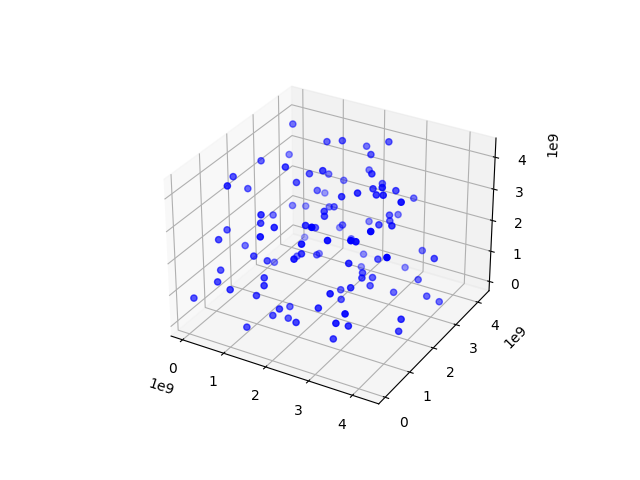

In [4]:
plt.figure()
ax = plt.axes(projection="3d")
x,y,z = split(rand_a(n,seed))
ax.scatter3D(x,y,z,c='b')

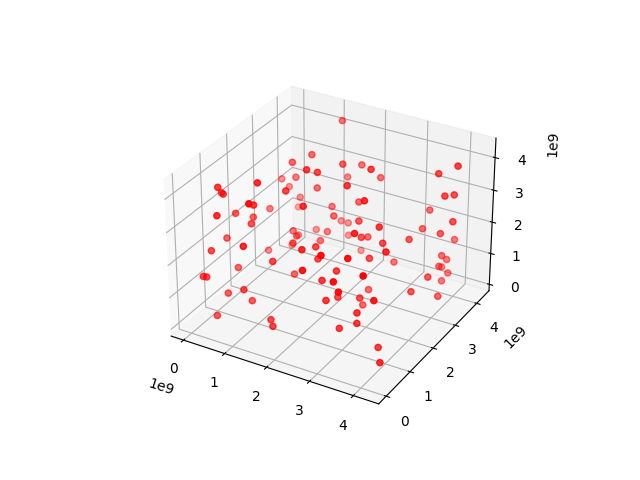

In [5]:
plt.figure()
ax = plt.axes(projection="3d")
x,y,z = split(rand_b(n,seed))
ax.scatter3D(x,y,z,c='r')

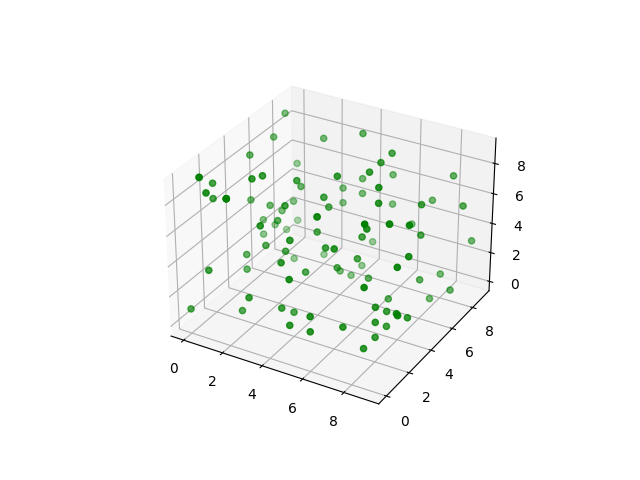

In [6]:
plt.figure()
ax = plt.axes(projection="3d")
x,y,z = split(rand_c(n))
ax.scatter3D(x,y,z,c='g')

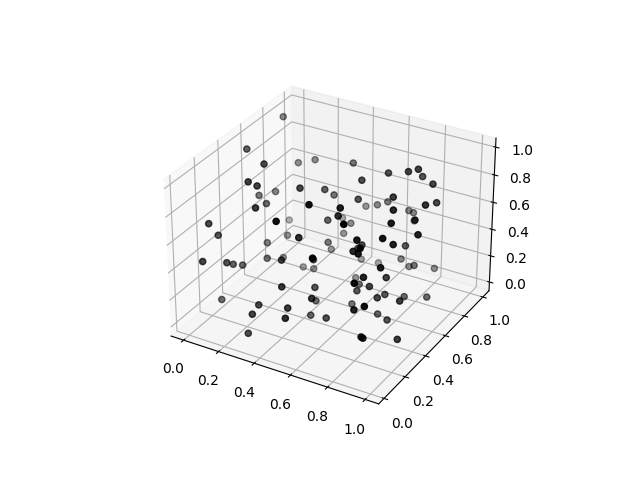

In [7]:
plt.figure()
ax = plt.axes(projection="3d")
x,y,z = split(rand_d(n))
ax.scatter3D(x,y,z,c='k')